#Task-1 Linear Regression-Student Score Prediction<br>
------------------------------------------------------



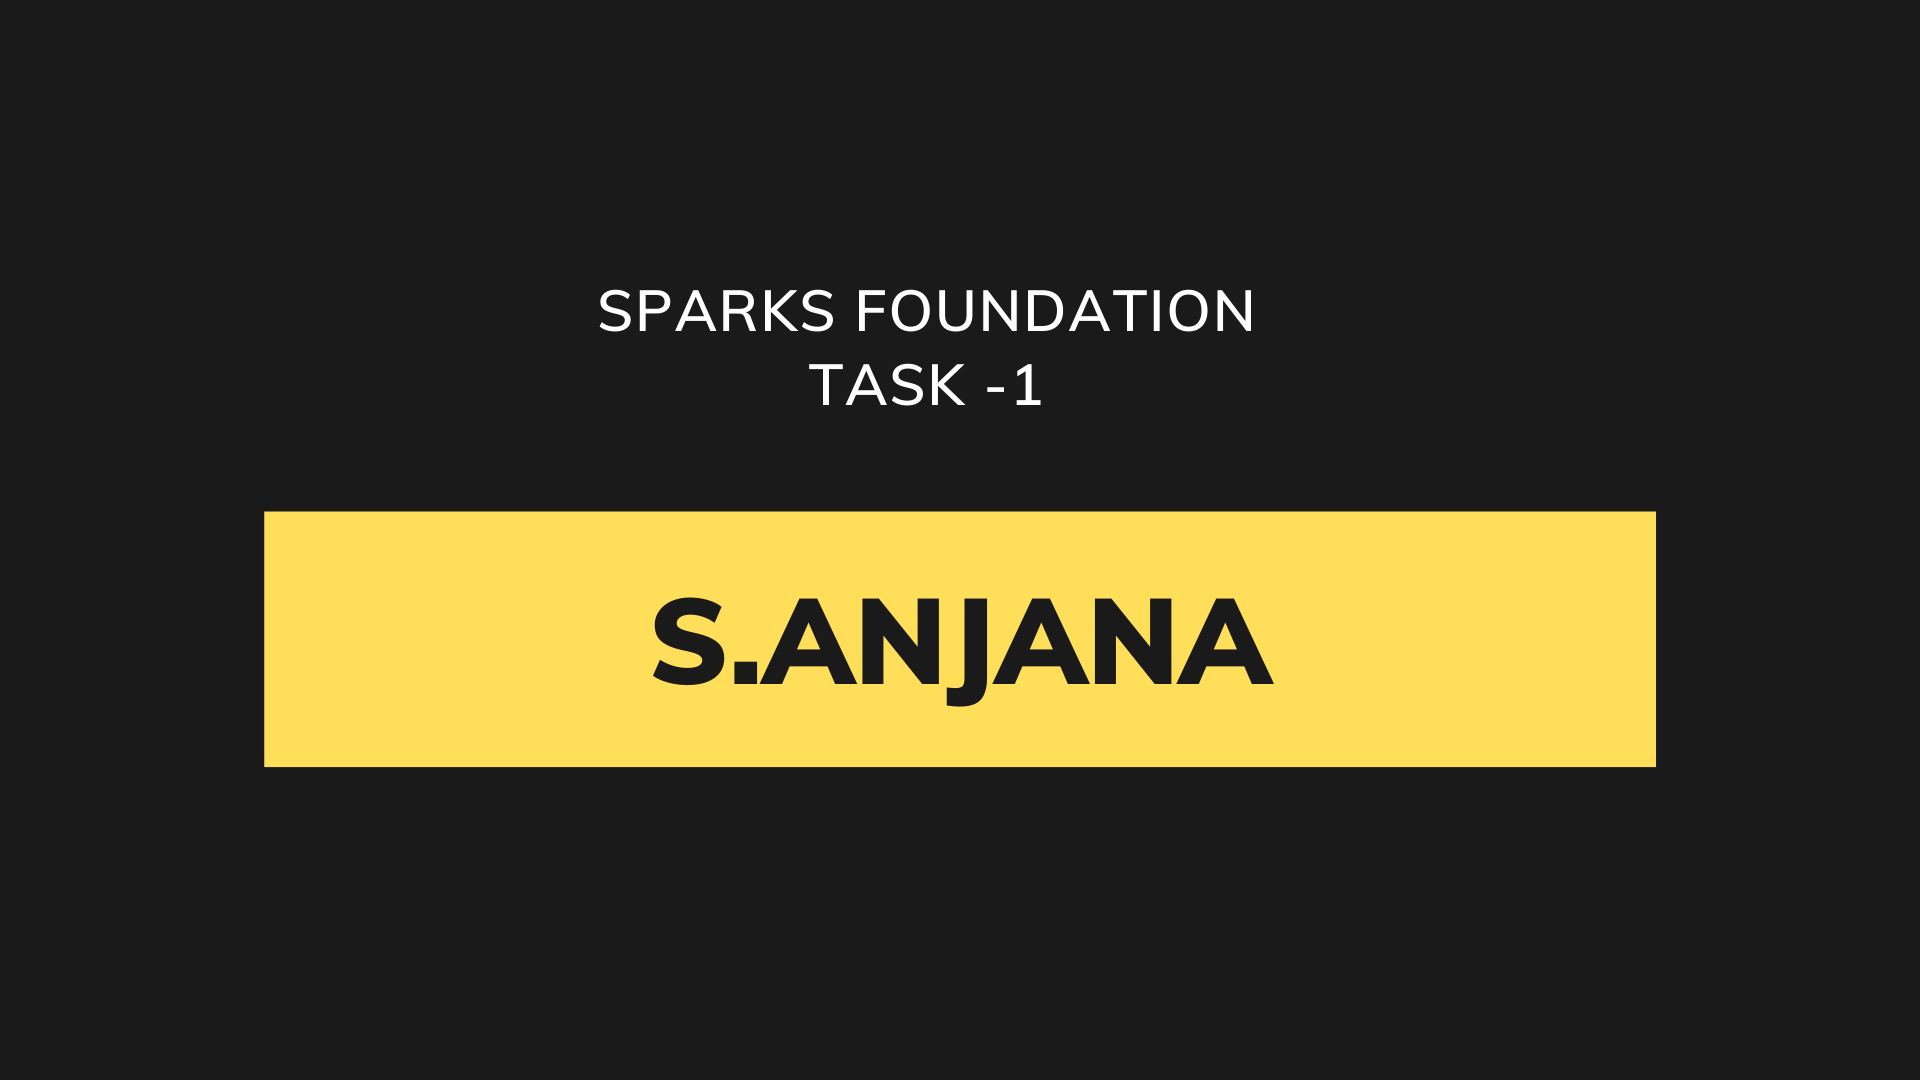

### What is Linear Regression?<br>
Linear Regression attempts to model the relationship between two variables by fitting a linear equation to the observed data

###Linear Equation
y=mx+b 
where m is the slope of the line and b is the y-intercept

In [2]:
import numpy as np
import pandas as pd

#Dataset Exploration

In [3]:
#reading data from the link given
dataset_link = "http://bit.ly/w-data"
dataset = pd.read_csv(dataset_link)

In [4]:
#Exploring what is in the dataset
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
dataset.shape

(25, 2)

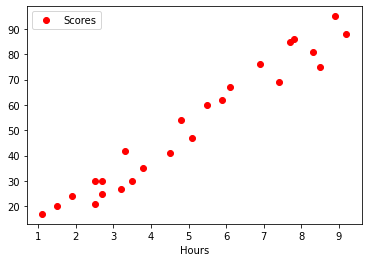

In [6]:
#Plotting the distribution of scores against hourly study of student
import matplotlib.pyplot as plt
dataset.plot(x='Hours',y='Scores',style='o',c='Red')
plt.show()

From the following codes we conclude the following things<br>
1) The datset has two columns one is hours of study and other is Percentage of Scores<br>
2)The datset has 25 student details<br>
3)When we plot data we could see a positive relation between Hours of study and percentage of scores

#Prepare and Split the Data

In [7]:
#Preparing the data
X = dataset.iloc[:,:-1].values  
Y = dataset.iloc[:, 1].values  

In [8]:
#Split the Data for testing 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

#Linear Regression

In [9]:
#Fit the Model
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

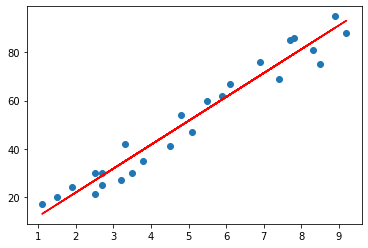

In [10]:
#line equation Y=ax+b
y=regression.coef_*X+regression.intercept_
plt.scatter(X,Y)
plt.plot(X,y,c='Red')
plt.show()

In [11]:
#Model Prediction
print(X_test)
Y_pred=regression.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
model_fit=pd.DataFrame({'Actual Data':Y_test,'Predicted Model':Y_pred})
print(model_fit)

   Actual Data  Predicted Model
0           20        16.884145
1           27        33.732261
2           69        75.357018
3           30        26.794801
4           62        60.491033


In [17]:
hours=[[9.25]]
pred = regression.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


In [14]:
#Model Accuracy
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)*100

94.54906892105353

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002982


##Conclusion<br>
Thus the hours of study and percentage of marks have a positive correlation and the student who studies for 9.25 hours gets the score of 93.69.The model accuracy is 94% and mean absolute error is 4.18